# Pandas Analysis of Netflix Shows and Movies

In [698]:
import pandas as pd # pip install pandas # if not owned

import matplotlib.pyplot as plt

from pathlib import Path

# import os

# change the paths below

USER_PATH = Path(r"C:\Users\Mateusz\Desktop\ZBIORCZE\TECH\ANALIZA DANYCH\Python\Projekty MB") # <--- here

df = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "data_cleaned.csv") 

df_cast = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "cast.csv") 

df_category = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "category.csv") 

df_country = pd.read_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "data_after_cleaning" / "country.csv") 

## 1. Actor and actress appearances in shows and movies

In [699]:
# merging two tables

a1 = df_cast.merge(df_cast, how = "inner")

a1 = a1.merge(df[["show_id", "type"]], how = "inner")

In [700]:
# creating pivot table - counting actor and actress appearances in shows and movies

pt_a1 = pd.pivot_table(
    a1,
    values="show_id",
    index="cast",
    columns="type",
    aggfunc="count"
)

#pt_a1 = pt_a1.reset_index()

#pt_a1[pt_a1["cast"] != "Unknown"]

In [701]:
# getting rid of null values and sorting dataframe

pt_a1 = pt_a1[pt_a1[["Movie", "Show"]].notna().all(axis=1)]

pt_a1["Sum"] = pt_a1["Movie"] + pt_a1["Show"]

pt_a1 = pt_a1.sort_values(by = "Sum", ascending = False)

In [702]:
# float type -> int type for all columns

col = pt_a1.columns

pt_a1[col] = pt_a1[col].astype(int)

pt_a1_top10 = pt_a1.iloc[1:11, :2].iloc[::-1] # 10 rows limit



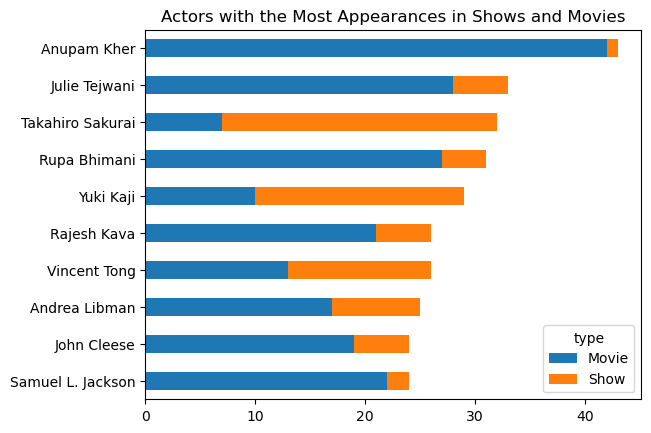

In [703]:
# chart and saving results

#pt_a1 = pt_a1.sort_values(by = "Sum", ascending=True)

pt_a1_top10.plot(kind = "barh", title = "Actors with the Most Appearances in Shows and Movies", stacked = True, ylabel = "")

plt.savefig(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "images" / "chart1.png", dpi=300, bbox_inches='tight')

plt.show()

pt_a1_top10.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "actors_appearances.csv", index = True) 

## 2. How Many Polish Movies and Shows has Netflix released (over the years)?

In [704]:
# extracting columns 

a2 = df[["type", "show_id", "country", "date_added"]]

# only rows that inlcudes 'Poland' in the country column
a2 = a2[a2["country"].str.contains("Poland")]

# extracting year from date_added column

a2["date_added"] = pd.to_datetime(a2["date_added"])

a2["date_added"] = a2.date_added.dt.year


In [705]:
# additional columns for analasis 

a2["movies"] = a2["type"].apply(lambda x: 1 if x == "Movie" else 0)

a2["shows"] = a2["type"].apply(lambda x: 1 if x == "Show" else 0)

a2["all"] = a2["type"].apply(lambda x:1)


In [706]:
# group by year

pt_a2 = a2.groupby("date_added")[["movies", "shows", "all"]].sum()

pt_a2

,movies,shows,all
date_added,,,
2016,0,1,1
2017,1,0,1
2018,6,1,7
2019,13,3,16
2020,8,2,10
2021,4,2,6


In [707]:
# saving a file

pt_a2.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "poland_movie_and_shows.csv", index = True) 

# pt a2 # remove hashtag if you want to see output within this file

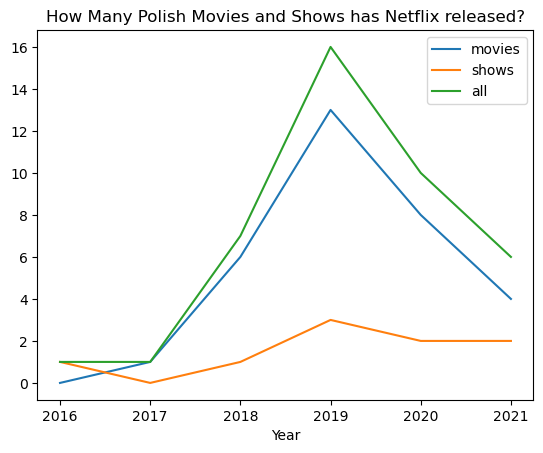

In [708]:
# final chart 

pt_a2.plot(kind = "line", title = "How Many Polish Movies and Shows has Netflix released?", xlabel = "Year")

plt.savefig(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "images" / "chart2.png", dpi=300, bbox_inches='tight')

plt.show()

# 3. średnia długość trwania movie i show wg kategorii 

# 4. American Actors and Directors Who Works Together The most

In [709]:
add = df[["show_id", "director", "country"]] # columns that are needed

add = add[add["country"].str.contains("United States")] # only USA

add = add[["show_id", "director"]] # only two columns are needed now

a4 = df_cast.merge(add, how="inner") # merging

a4 = a4[(~a4["cast"].str.contains("Unknown")) & (~a4["director"].str.contains("Unknown"))] # getting rid of 'Unknown' values

# a4

In [710]:
pt_a4 = a4.groupby(["cast", "director"]).count()

pt_a4 = pt_a4.sort_values(by = "show_id", ascending=False)

pt_a4 = pt_a4.iloc[0:10]

In [711]:
pt_a4 = pt_a4.reset_index()

# making names shorter
pt_a4["cast"] = pt_a4["cast"].str.split()
pt_a4["cast"] = pt_a4["cast"].str[1]

pt_a4["director"] = pt_a4["director"].str.split()
pt_a4["director"] = pt_a4["director"].str[1]


In [712]:
# final output

pt_a4["duo"] = pt_a4["cast"] + " & " + pt_a4["director"]

pt_a4 = pt_a4[["duo", "show_id"]]

pt_a4

,duo,show_id
0,PenaVega & Rodriguez,5
1,Trejo & Rodriguez,4
2,Keitel & Scorsese,4
3,Sabara & Rodriguez,4
4,Mewes & Smith,4
5,Ford & Spielberg,4
6,Eastwood & Eastwood,4
7,Sandler & Brill,4
8,Blair & Saulnier,4
9,Wayans & Tiddes,4


In [713]:
# saving a file

pt_a4.to_csv(USER_PATH / "Pandas Analysis of Netflix Shows and Movies" / "data" / "results" / "duos.csv") 

In [714]:
# setting up indexes
"""
df.set_index(["show_id"], inplace = True) 

df = df.sort_index()

df_cast.set_index(["show_id"], inplace = True) 

df_cast = df_cast.sort_index()

df_country.set_index(["show_id"], inplace = True) 

df_country = df_country.sort_index()

df_category.set_index(["show_id"], inplace = True) 

df_category = df_category.sort_index()
"""

'\ndf.set_index(["show_id"], inplace = True) \n\ndf = df.sort_index()\n\ndf_cast.set_index(["show_id"], inplace = True) \n\ndf_cast = df_cast.sort_index()\n\ndf_country.set_index(["show_id"], inplace = True) \n\ndf_country = df_country.sort_index()\n\ndf_category.set_index(["show_id"], inplace = True) \n\ndf_category = df_category.sort_index()\n'

In [715]:
#pivot table z długością filmów i seriali bez null values

# kraje i kategorie

## TV shows and movies duration - Comparision

In [716]:
duration = df.groupby("type")["length"].agg(["mean", "median"])

duration.round(2)

movie_duration = duration.iloc[0]

show_duration = duration.iloc[1]

In [717]:
duration

,mean,median
type,,
Movie,99.577187,98.0
Show,1.764948,1.0


<Axes: title={'center': 'Movie Duration'}, ylabel='Minutes'>

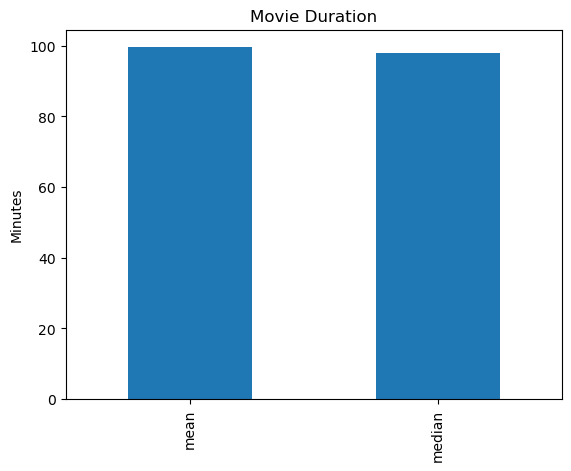

In [718]:
movie_duration.plot(kind = 'bar', title = "Movie Duration", ylabel = "Minutes")

<Axes: title={'center': 'Show Duration'}, ylabel='Seasons'>

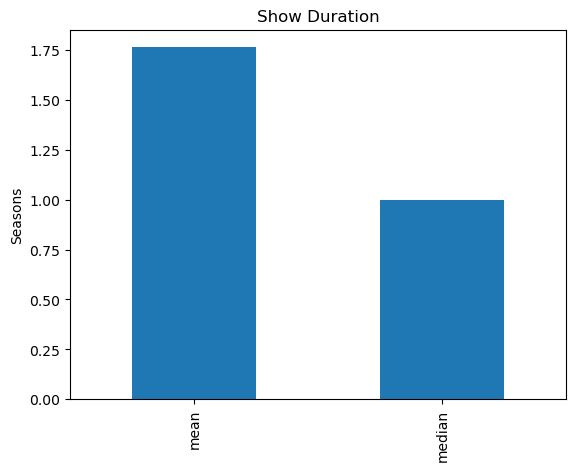

In [719]:
show_duration.plot(kind = 'bar', title = "Show Duration", ylabel = "Seasons")

In [720]:
category = df.merge(df_category, how = "inner")


In [721]:
# print(max_duration.columns)

In [722]:
category["listed_in"] = category["listed_in"].str.replace("TV","")

category["listed_in"] = category["listed_in"].str.replace("Movies","")

category["listed_in"] = category["listed_in"].str.strip() # lstrip was needed

In [723]:
pt_category = pd.pivot_table(
    category,
    values="length",
    index="listed_in",
    columns="type",
    aggfunc="count"
)

In [724]:
pt_category = pt_category.reset_index()


df2 = pt_category["Movie"] + pt_category["Show"]

In [725]:
#pt_category["Comparision"]

In [726]:
pt_category = pt_category.reset_index()

# pt_category

In [727]:
pt_category.groupby("listed_in")[["Movie", "Show"]].sum()

type,Movie,Show
listed_in,,
,54.0,0.0
Action & Adventure,128.0,1.0
Anime Features,1.0,0.0
Anime Series,0.0,10.0
Children & Family,215.0,0.0
Comedies,110.0,69.0
Documentaries,359.0,0.0
Docuseries,0.0,85.0
Dramas,138.0,35.0


In [728]:
max_duration = df.groupby("type")["length"].max()

